# Plotting for Project 1 FYS3150

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

output_dir = os.path.join(os.getcwd(), '../output')

## Problem 2
We will start by opening the problem2data.out file created by problem2.cpp. Once the data is opened we convert to dataframe and plot it.

In [2]:
with open(os.path.join(output_dir, 'problem2data.out'), 'r') as f:
    problem2df = pd.read_csv(f, sep=' ')

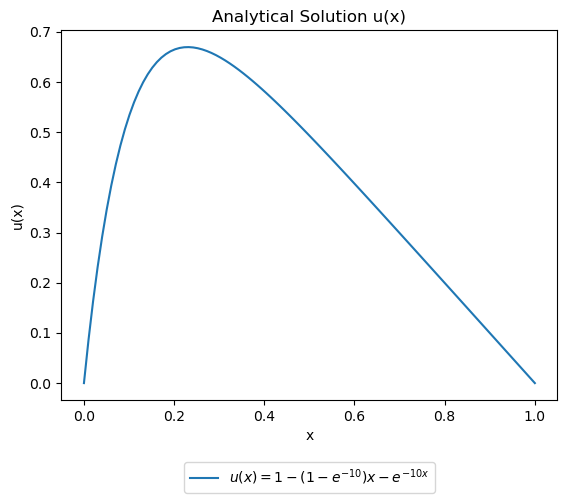

In [3]:
plt.plot(problem2df['x'], problem2df['u'], label=r'$u(x) = 1 - (1 - e^{-10}) x - e^{-10 x}$')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Analytical Solution u(x)')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), )

plt.savefig(os.path.join('Illustrations', 'problem2fig.pdf'), bbox_inches='tight')
plt.show()


## Problem 7 and 8
We will start by opening the problem7data.out file created by problem7.cpp. Once the data is opened we convert to dataframe and plot it.

In [4]:
with open(os.path.join(output_dir, 'problem7data.out'), 'r') as f:
    lines = f.readlines()

for line in lines[:15]:
    print(line)

x u v abs_error rel_error

 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00

 1.00000000e-01 5.32125099e-01 4.89913527e-01 4.22115715e-02 7.93264058e-02

 2.00000000e-01 6.64673797e-01 6.11947613e-01 5.27261833e-02 7.93264058e-02

 3.00000000e-01 6.50226552e-01 5.98646416e-01 5.15801353e-02 7.93264058e-02

 4.00000000e-01 5.81702521e-01 5.35558151e-01 4.61443702e-02 7.93264058e-02

 5.00000000e-01 4.93284753e-01 4.54154246e-01 3.91305065e-02 7.93264058e-02

 6.00000000e-01 3.97548488e-01 3.66012395e-01 3.15360927e-02 7.93264058e-02

 7.00000000e-01 2.99119898e-01 2.75391792e-01 2.37281064e-02 7.93264058e-02

 8.00000000e-01 1.99700857e-01 1.83859306e-01 1.58415512e-02 7.93264058e-02

 9.00000000e-01 9.99174501e-02 9.19913579e-02 7.92609219e-03 7.93264058e-02

 1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00



x u v abs_error rel_error

 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00



the data is written to one file so we will have to seperate by the blank lines, the blank lines  are length 1.

In [5]:
new_resolution_indx = [indx for indx, line in enumerate(lines) if len(line)== 1]

n_steps_config = [10, 100, 1000, 10000, 100000]

previous_indx = 0
dataframes = {}
for indx, n_steps in zip(new_resolution_indx, n_steps_config):
    
    line_selection = lines[previous_indx:indx]
    df = pd.DataFrame([s.strip().split() for s in line_selection[1:]], columns=line_selection[0].strip().split(), dtype=np.float64)
    dataframes[n_steps] = df
    previous_indx = indx+1

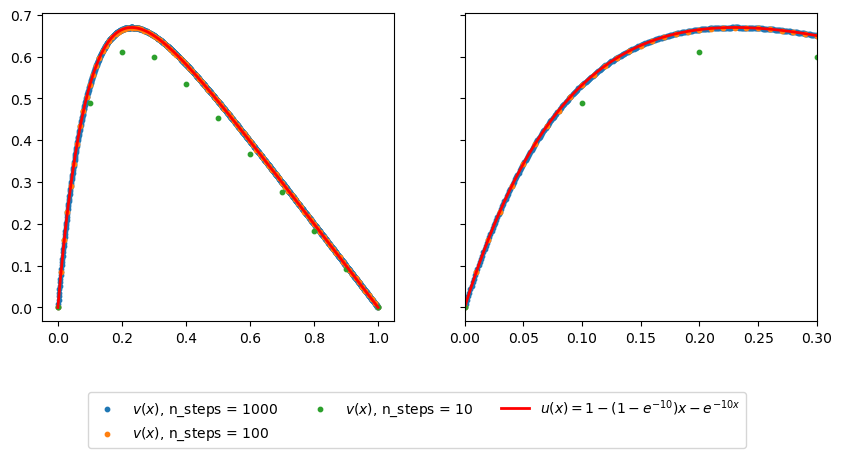

In [6]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 4), sharey=True)

for ax in axs.flatten():
    
    for n_steps in [1000, 100, 10]:
        
        df = dataframes[n_steps]
        ax.scatter(df['x'], df['v'], label=rf'$v(x)$, n_steps = {n_steps}', s=10)

    ax.plot(
        dataframes[10000]['x'], dataframes[10000]['u'], 
        color='red', lw=2,
        label=r'$u(x) = 1 - (1 - e^{-10}) x - e^{-10 x}$')

axs[1].set_xlim(.0, .3)

handles, labels = axs[0].get_legend_handles_labels()

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)



plt.savefig(os.path.join('Illustrations', 'problem7fig.pdf'), bbox_inches='tight')
plt.show()

# Problem 8

a) we take the logarithm of the column "abs_error"

In [8]:
dataframes[100]['rel_error']

0      0.000000
1      0.000833
2      0.000833
3      0.000833
4      0.000833
         ...   
96     0.000833
97     0.000833
98     0.000833
99     0.000833
100    0.000000
Name: rel_error, Length: 101, dtype: float64

/home/jofje7431/miniforge3/envs/pyenvFYS3150/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


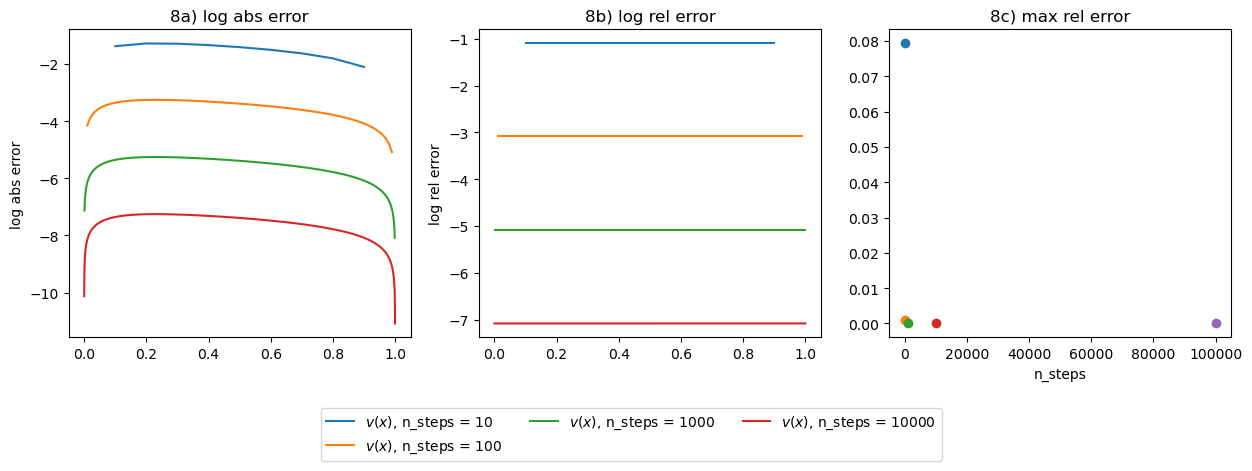

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

axs = axs.flatten()

axs[0].set_title("8a) log abs error")
axs[0].set_ylabel("log abs error")

for n_steps in [10, 100, 1000, 10000]:
    df = dataframes[n_steps]
    axs[0].plot(df['x'], np.log10(df['abs_error']), label=rf'$v(x)$, n_steps = {n_steps}')

axs[1].set_title("8b) log rel error")
axs[1].set_ylabel("log rel error")

for n_steps in [10, 100, 1000, 10000]:
    df = dataframes[n_steps]
    axs[1].plot(df['x'], np.log10(df['rel_error']), label=rf'$v(x)$, n_steps = {n_steps}')

axs[2].set_title("8c) max rel error")

for n_steps in [10, 100, 1000, 10000, 100000]:
    df = dataframes[n_steps]
    axs[2].scatter(n_steps, df['rel_error'].max(), label=rf'$v(x)$, n_steps = {n_steps}')
    axs[2].set_xlabel("n_steps")
    axs[2].set_xscale


handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

plt.savefig(os.path.join('Illustrations', 'problem8fig.pdf'), bbox_inches='tight')
plt.show()

In [14]:
n_steps_config = [10, 100, 1000, 10000, 100000]
max_rel_error = [df['rel_error'].max() for df in dataframes.values()]

df = pd.DataFrame({'n_steps': n_steps_config, 'max_rel_error': max_rel_error})

df

,n_steps,max_rel_error
0,10,7.932641e-02
1,100,8.329168e-04
2,1000,8.333292e-06
3,10000,8.333006e-08
4,100000,1.435597e-09
